<center>
    <img src="https://clubhistory.ru/images/img/blog/spidkubing-4.jpg" width=500px/>
    <font>Cпециализация BigData'23</font><br/>
    <br/>
    <br/>
    <b style="font-size: 2em">Разведочный анализ данных</b><br/>
    <br/>
    <font>Илья Шишов</font><br/>
</center>

Краткое содержание
- Виды данных: плоские, пространственные, временные, графовые, смешанные
- Типы данных: непрерывные, дискретные, булевые, категориальные/числовые
- Оценки центрального положения данных: среднее, медиана, мода, выбросы, пропущенные значения.
- Оценки вариабельности данных: дисперсия, СКО, размах
- Методы борьбы с выбросами, эвристики заполнения пропущенных значений.
- Распределения данных (гистограмма, scatter, pair-plot)
- Корреляция фичей
- Нормализация


# 1 Виды данных

## 1.1 Плоские (табличные)

In [1]:
# !python3.10 -m pip install --upgrade pip
# !pip3 install pandas
# !pip3 install numpy
# !pip3 install geoviews
# !pip3 install pyglet

In [2]:
import pandas as pd
data = pd.read_csv('datasets/FIFA23_official_data.csv')

In [3]:
data.head(5)

ID             Name  Age  \
0  209658      L. Goretzka   27   
1  212198  Bruno Fernandes   27   
2  224334         M. Acuña   30   
3  192985     K. De Bruyne   31   
4  224232       N. Barella   25   

                                              Photo Nationality  \
0  https://cdn.sofifa.net/players/209/658/23_60.png     Germany   
1  https://cdn.sofifa.net/players/212/198/23_60.png    Portugal   
2  https://cdn.sofifa.net/players/224/334/23_60.png   Argentina   
3  https://cdn.sofifa.net/players/192/985/23_60.png     Belgium   
4  https://cdn.sofifa.net/players/224/232/23_60.png       Italy   

                                  Flag  Overall  Potential               Club  \
0  https://cdn.sofifa.net/flags/de.png       87         88  FC Bayern München   
1  https://cdn.sofifa.net/flags/pt.png       86         87  Manchester United   
2  https://cdn.sofifa.net/flags/ar.png       85         85         Sevilla FC   
3  https://cdn.sofifa.net/flags/be.png       91         91    Manchester City   
4  https://cdn.sofifa.net/flags/it.png       86         89              Inter   

                                 Club Logo  ... Real Face  \
0   https://cdn.sofifa.net/teams/21/30.png  ...       Yes   
1   https://cdn.sofifa.net/teams/11/30.png  ...       Yes   
2  https://cdn.sofifa.net/teams/481/30.png  ...        No   
3   https://cdn.sofifa.net/teams/10/30.png  ...       Yes   
4   https://cdn.sofifa.net/teams/44/30.png  ...       Yes   

                      Position        Joined Loaned From  \
0  <span class="pos pos28">SUB   Jul 1, 2018         NaN   
1  <span class="pos pos15">LCM  Jan 30, 2020         NaN   
2    <span class="pos pos7">LB  Sep 14, 2020         NaN   
3  <span class="pos pos13">RCM  Aug 30, 2015         NaN   
4  <span class="pos pos13">RCM   Sep 1, 2020         NaN   

   Contract Valid Until  Height  Weight Release Clause Kit Number  \
0                  2026   189cm    82kg          €157M        8.0   
1                  2026   179cm    69kg          €155M        8.0   
2                  2024   172cm    69kg         €97.7M       19.0   
3                  2025   181cm    70kg        €198.9M       17.0   
4                  2026   172cm    68kg        €154.4M       23.0   

  Best Overall Rating  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 29 columns]

## 1.2 Географические данные

In [4]:
# !pip3 install geopandas
# !pip3 install matplotlib

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
# data = read_csv('datasets/bus.csv')

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [6]:
world

pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    -99     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

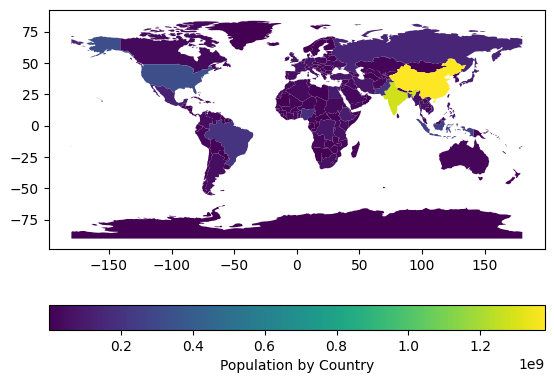

In [7]:
fig, ax = plt.subplots(1, 1)
world.plot(column='pop_est',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

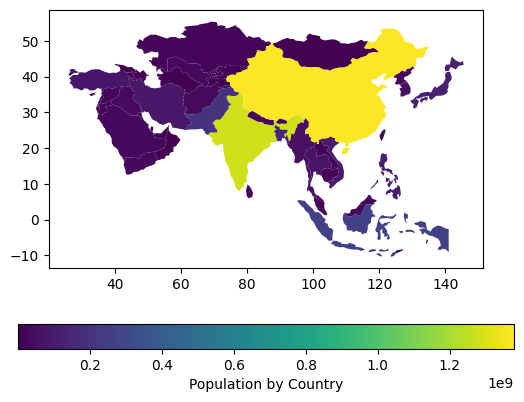

In [8]:
fig, ax = plt.subplots(1, 1)
world[world['continent'] == 'Asia'].plot(column='pop_est',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


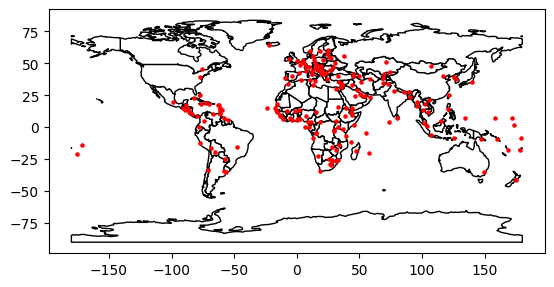

In [9]:
base = world.plot(color='white', edgecolor='black')
cities.plot(ax=base, marker='o', color='red', markersize=5);

## 1.3 Графовые данные

In [ ]:
# !pip install matplotlib==3.5.2
# !pip3 install networkx

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)

BrighamYoung         12
FloridaState         12
Iowa                 12
KansasState          12
NewMexico            11
TexasTech            12
PennState            12
SouthernCalifornia   12
ArizonaState         11
SanDie

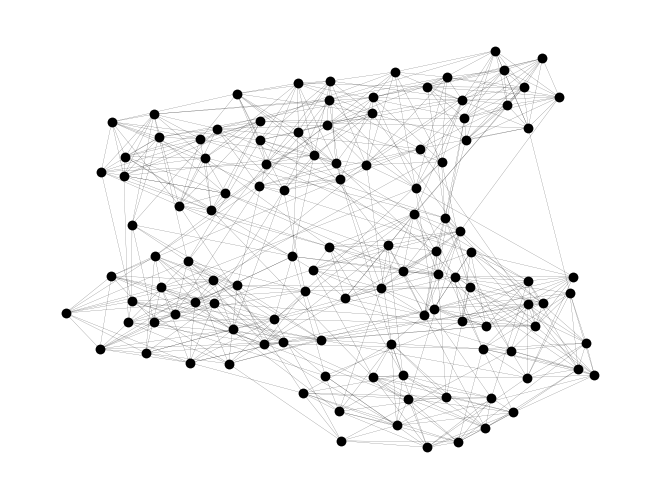

In [10]:
import urllib.request
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data

print(txt)
# print degree for each team - number of games
for n, d in G.degree():
    print(f"{n:20} {d:2}")

options = {"node_color": "black", "node_size": 50, "linewidths": 0, "width": 0.1}

pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.show()

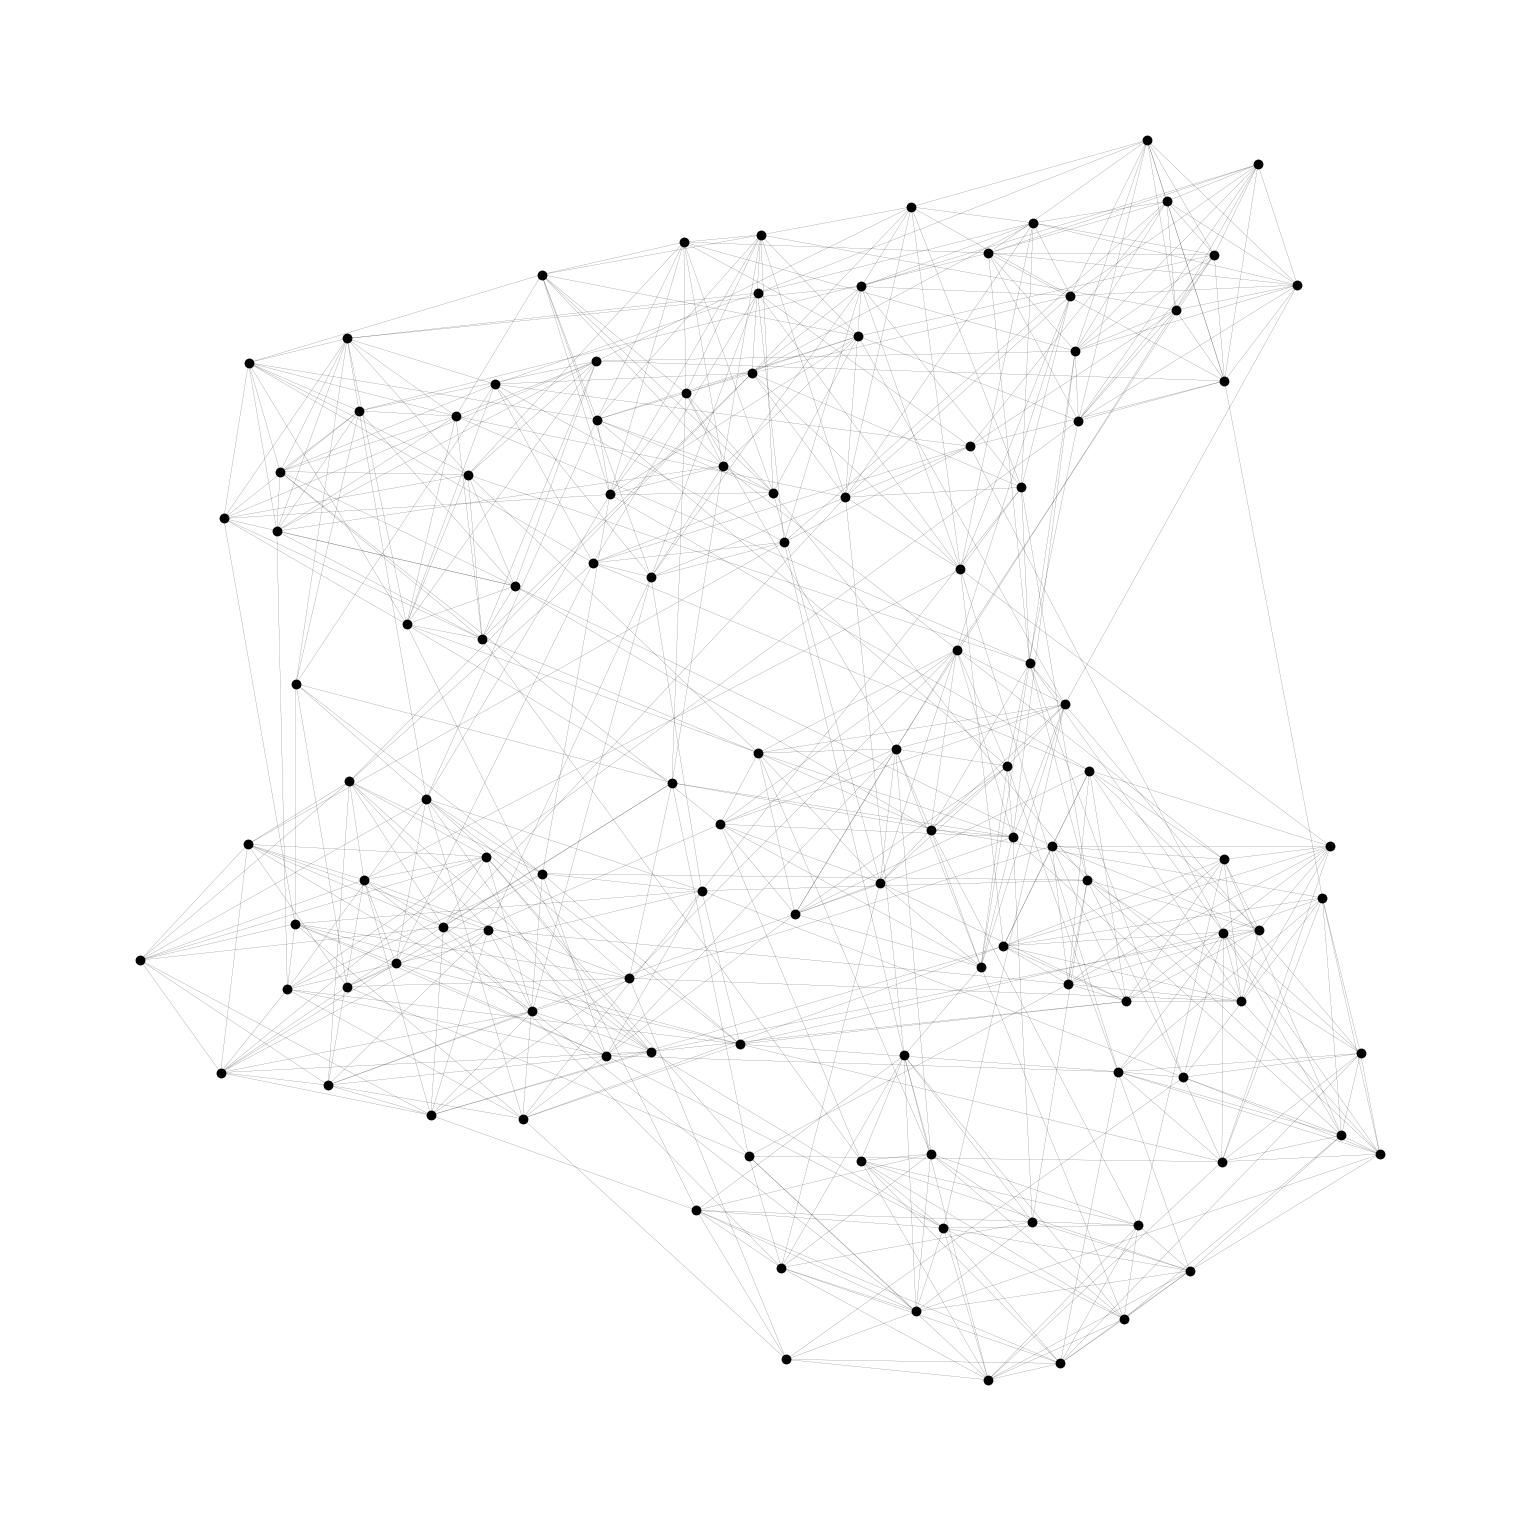

In [11]:
plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.show()

In [12]:
import networkx as nx

In [13]:
graph = nx.DiGraph()

In [14]:
friends = [['Petr', 'Vasya'], ['Vasya', 'Lena'], ['Lena', 'Alla'], ['Kristina', 'Alla'],  ['Vasya', 'Kristina']]

In [15]:
graph.add_edges_from(friends)

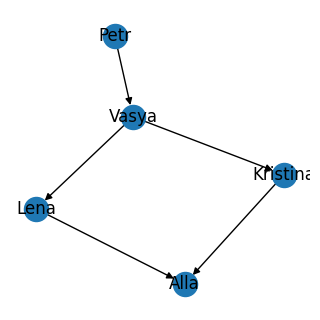

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
nx.draw(graph, with_labels=True)

## 1.4 Временные ряды

[Выработка электроэнергии](https://fred.stlouisfed.org/series/IPG2211A2N)

In [17]:
ts =  pd.read_csv("datasets/electric_production.csv")
ts.head(20)

DATE  IPG2211A2N
0    1/1/1985     72.5052
1    2/1/1985     70.6720
2    3/1/1985     62.4502
3    4/1/1985     57.4714
4    5/1/1985     55.3151
5    6/1/1985     58.0904
6    7/1/1985     62.6202
7    8/1/1985     63.2485
8    9/1/1985     60.5846
9   10/1/1985     56.3154
10  11/1/1985     58.0005
11  12/1/1985     68.7145
12   1/1/1986     73.3057
13   2/1/1986     67.9869
14   3/1/1986     62.2221
15   4/1/1986     57.0329
16   5/1/1986     55.8137
17   6/1/1986     59.9005
18   7/1/1986     65.7655
19   8/1/1986     64.4816

In [18]:
ts["DATE"].info()

AttributeError: 'Series' object has no attribute 'info'

In [20]:
ts = pd.read_csv("datasets/electric_production.csv", parse_dates=['DATE'])
ts.head(5)

DATE  IPG2211A2N
0 1985-01-01     72.5052
1 1985-02-01     70.6720
2 1985-03-01     62.4502
3 1985-04-01     57.4714
4 1985-05-01     55.3151

In [21]:
ts["DATE"].info()

AttributeError: 'Series' object has no attribute 'info'

In [22]:
ts.set_index('DATE', inplace=True)

In [23]:
ts

IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
...                ...
2017-09-01     98.6154
2017-10-01     93.6137
2017-11-01     97.3359
2017-12-01    114.7212
2018-01-01    129.4048

[397 rows x 1 columns]

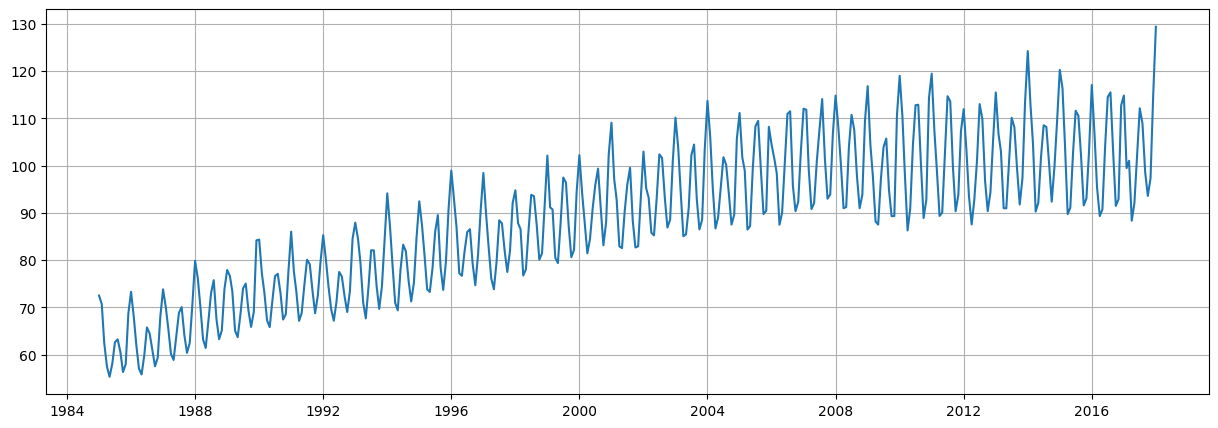

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(ts)

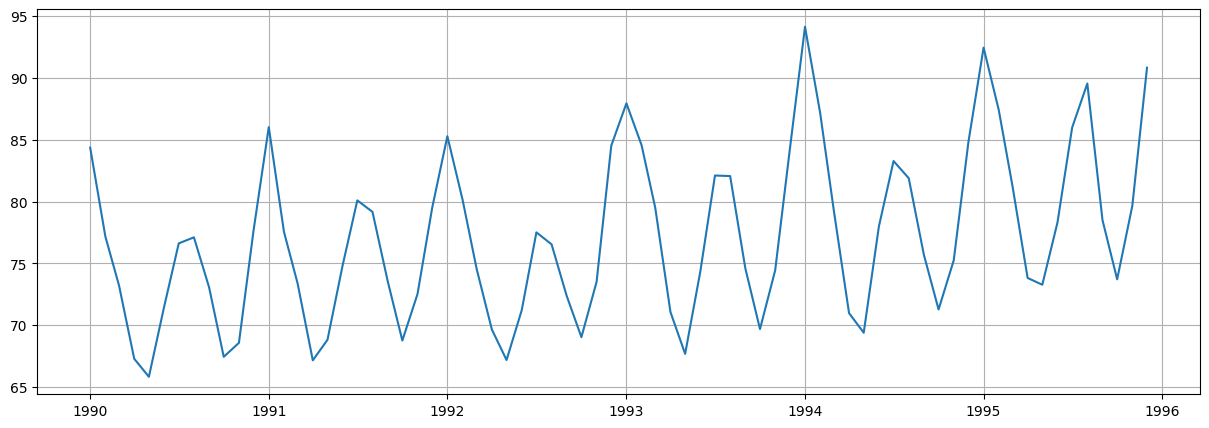

In [25]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(ts.loc["1990":"1995"])

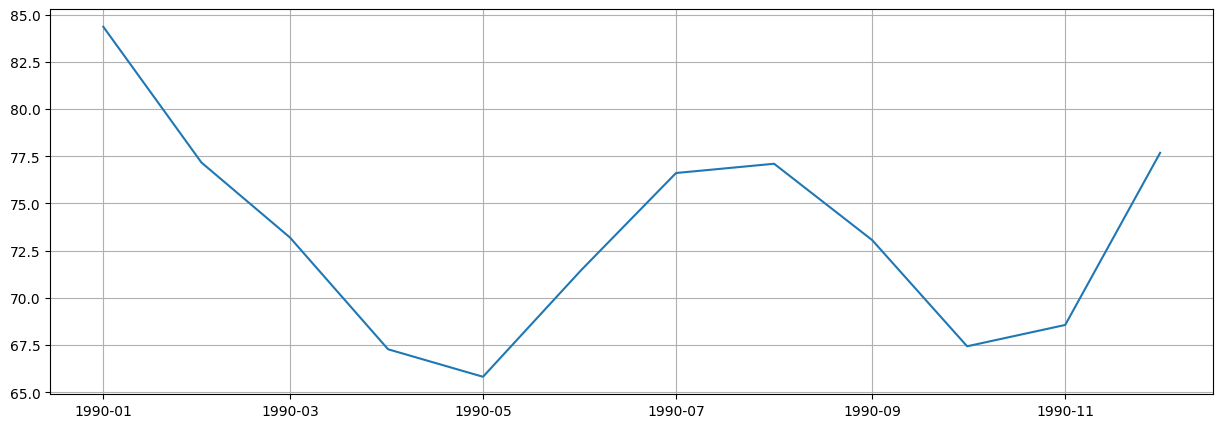

In [26]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(ts.loc["1990":"1990"])

In [27]:
usd_rub = pd.read_csv('datasets/usd_rub.csv', parse_dates=["<DATE>"])

In [28]:
usd_rub

<DATE>  <TIME>   <OPEN>   <HIGH>    <LOW>  <CLOSE>   <VOL>
0    2015-02-02       0  69.9388  70.4760  67.3750  68.1241  356601
1    2015-02-03       0  68.3762  68.4876  63.5843  64.4940  336083
2    2015-02-04       0  65.6933  68.5577  63.9104  67.6082  374233
3    2015-02-05       0  67.8413  68.9520  65.0699  66.1781  356492
4    2015-02-06       0  66.5423  67.5646  64.9151  66.0246  301390
...         ...     ...      ...      ...      ...      ...     ...
2736 2023-02-13       0  72.9000  74.3260  71.9250  73.1750     822
2737 2023-02-14       0  73.2069  74.1000  71.9500  73.5995     732
2738 2023-02-15       0  73.5981  74.8419  72.6000  73.9936    4625
2739 2023-02-16       0  73.9877  75.1000  73.4000  74.7113    4032
2740 2023-02-17       0  74.7087  75.2750  72.6500  73.6381    3923

[2741 rows x 7 columns]

In [29]:
usd_rub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   <DATE>   2741 non-null   datetime64[ns]
 1   <TIME>   2741 non-null   int64         
 2   <OPEN>   2741 non-null   float64       
 3   <HIGH>   2741 non-null   float64       
 4   <LOW>    2741 non-null   float64       
 5   <CLOSE>  2741 non-null   float64       
 6   <VOL>    2741 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 150.0 KB


In [30]:
usd_rub.set_index("<DATE>", inplace=True)

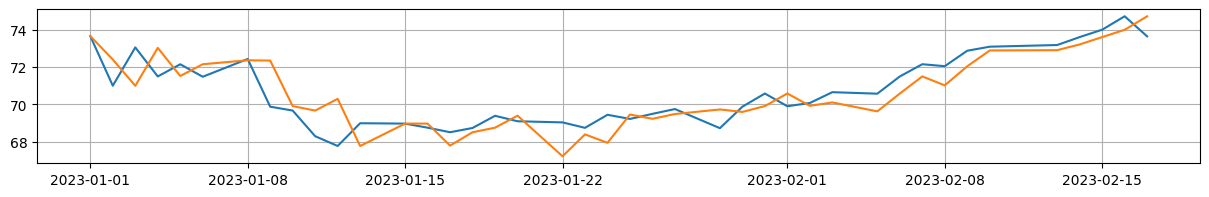

In [31]:
plt.figure(figsize=(15,2))
plt.plot(usd_rub.loc['2023-01-01':]["<CLOSE>"])
plt.plot(usd_rub.loc['2023-01-01':]["<OPEN>"])
plt.grid()

In [32]:
usd_rub['is_positive'] = usd_rub.apply(lambda x: x["<CLOSE>"] >= x["<OPEN>"], axis=1)

In [33]:
usd_rub.groupby('is_positive').count()['<OPEN>']

is_positive
False    1388
True     1353
Name: <OPEN>, dtype: int64

# Типы данных

In [34]:
df = pd.read_csv('datasets/FIFA23_official_data.csv')

In [35]:
df.head(5)

ID             Name  Age  \
0  209658      L. Goretzka   27   
1  212198  Bruno Fernandes   27   
2  224334         M. Acuña   30   
3  192985     K. De Bruyne   31   
4  224232       N. Barella   25   

                                              Photo Nationality  \
0  https://cdn.sofifa.net/players/209/658/23_60.png     Germany   
1  https://cdn.sofifa.net/players/212/198/23_60.png    Portugal   
2  https://cdn.sofifa.net/players/224/334/23_60.png   Argentina   
3  https://cdn.sofifa.net/players/192/985/23_60.png     Belgium   
4  https://cdn.sofifa.net/players/224/232/23_60.png       Italy   

                                  Flag  Overall  Potential               Club  \
0  https://cdn.sofifa.net/flags/de.png       87         88  FC Bayern München   
1  https://cdn.sofifa.net/flags/pt.png       86         87  Manchester United   
2  https://cdn.sofifa.net/flags/ar.png       85         85         Sevilla FC   
3  https://cdn.sofifa.net/flags/be.png       91         91    Manchester City   
4  https://cdn.sofifa.net/flags/it.png       86         89              Inter   

                                 Club Logo  ... Real Face  \
0   https://cdn.sofifa.net/teams/21/30.png  ...       Yes   
1   https://cdn.sofifa.net/teams/11/30.png  ...       Yes   
2  https://cdn.sofifa.net/teams/481/30.png  ...        No   
3   https://cdn.sofifa.net/teams/10/30.png  ...       Yes   
4   https://cdn.sofifa.net/teams/44/30.png  ...       Yes   

                      Position        Joined Loaned From  \
0  <span class="pos pos28">SUB   Jul 1, 2018         NaN   
1  <span class="pos pos15">LCM  Jan 30, 2020         NaN   
2    <span class="pos pos7">LB  Sep 14, 2020         NaN   
3  <span class="pos pos13">RCM  Aug 30, 2015         NaN   
4  <span class="pos pos13">RCM   Sep 1, 2020         NaN   

   Contract Valid Until  Height  Weight Release Clause Kit Number  \
0                  2026   189cm    82kg          €157M        8.0   
1                  2026   179cm    69kg          €155M        8.0   
2                  2024   172cm    69kg         €97.7M       19.0   
3                  2025   181cm    70kg        €198.9M       17.0   
4                  2026   172cm    68kg        €154.4M       23.0   

  Best Overall Rating  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 29 columns]

In [36]:
for i, col in enumerate(df.columns):
    print(f"{col} has type: {df[col].dtype}")
#     if df[col].dtype == object:
    print(df[col][0])
    print("=" * 10)

ID has type: int64
209658
Name has type: object
L. Goretzka
Age has type: int64
27
Photo has type: object
https://cdn.sofifa.net/players/209/658/23_60.png
Nationality has type: object
Germany
Flag has type: object
https://cdn.sofifa.net/flags/de.png
Overall has type: int64
87
Potential has type: int64
88
Club has type: object
FC Bayern München
Club Logo has type: object
https://cdn.sofifa.net/teams/21/30.png
Value has type: object
€91M
Wage has type: object
€115K
Special has type: int64
2312
Preferred Foot has type: object
Right
International Reputation has type: float64
4.0
Weak Foot has type: float64
4.0
Skill Moves has type: float64
3.0
Work Rate has type: object
High/ Medium
Body Type has type: object
Unique
Real Face has type: object
Yes
Position has type: object
<span class="pos pos28">SUB
Joined has type: object
Jul 1, 2018
Loaned From has type: object
nan
Contract Valid Until has type: object
2026
Height has type: object
189cm
Weight has type: object
82kg
Release Clause has typ

## В общем случае данные делятся числовые и категориальные.

## Числовые

In [38]:
for i, col in enumerate(df.columns):
    if df[col].dtype in (int, float):
        print(f"{col}: {df[col][0]}")

ID: 209658
Age: 27
Overall: 87
Potential: 88
Special: 2312
International Reputation: 4.0
Weak Foot: 4.0
Skill Moves: 3.0
Kit Number: 8.0


In [39]:
df.describe()

ID           Age       Overall     Potential       Special  \
count   17660.000000  17660.000000  17660.000000  17660.000000  17660.000000   
mean   246319.424462     23.127746     63.369592     70.981200   1537.915855   
std     31487.892861      4.639821      8.036268      6.529836    285.893809   
min        16.000000     15.000000     43.000000     42.000000    749.000000   
25%    240732.500000     20.000000     58.000000     67.000000   1387.000000   
50%    257041.000000     22.000000     63.000000     71.000000   1548.000000   
75%    263027.500000     26.000000     69.000000     75.000000   1727.000000   
max    271340.000000     54.000000     91.000000     95.000000   2312.000000   

       International Reputation     Weak Foot   Skill Moves    Kit Number  
count              17660.000000  17660.000000  17660.000000  17625.000000  
mean                   1.106285      2.900340      2.297169     25.037957  
std                    0.407021      0.663523      0.754264     19.154116  
min                    1.000000      1.000000      1.000000      1.000000  
25%                    1.000000      3.000000      2.000000     11.000000  
50%                    1.000000      3.000000      2.000000     22.000000  
75%                    1.000000      3.000000      3.000000     32.000000  
max                    5.000000      5.000000      5.000000     99.000000

In [48]:
# Дискретные целочисленные (int)
df['Age'].unique()

array([27, 30, 31, 25, 32, 28, 26, 36, 33, 34, 29, 23, 35, 22, 24, 19, 21,
       37, 40, 20, 38, 17, 39, 18, 41, 42, 16, 54, 44, 43, 15])

In [49]:
# Дискретные с плавающей точкой (float)
sorted(df['Skill Moves'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0]

In [50]:
# Непрерывные (float)

# df["BMI"] = df['Weight'] / df['Height'] /  df['Height']

In [51]:
df['Weight']

0        82kg
1        69kg
2        69kg
3        70kg
4        68kg
         ... 
17655    78kg
17656    84kg
17657    82kg
17658    79kg
17659    78kg
Name: Weight, Length: 17660, dtype: object

In [52]:
df["Height"]

0        189cm
1        179cm
2        172cm
3        181cm
4        172cm
         ...  
17655    190cm
17656    195cm
17657    190cm
17658    187cm
17659    186cm
Name: Height, Length: 17660, dtype: object

In [53]:
df['Weight'] = df['Weight'].str.replace("kg", '').astype(int)

In [54]:
df["Height"] = df["Height"].str.replace("cm", '').astype(int)

In [55]:
# Индекс массы тела
df['BMI'] = df['Weight'] / (df["Height"])**2 * 10000

In [56]:
df['BMI'].unique() # Комбинация дискретных уже может давать непрерывный диапазон

array([22.95568433, 21.5349084 , 23.32341806, ..., 21.59722391,
       21.42638506, 19.13061962])

In [57]:
df['BMI'].nunique()

1004

In [58]:
df['Weight'].nunique(), df['Height'].nunique()

(58, 51)

## Категориальные

In [59]:
# Категориальные 
df['Nationality'].unique()

array(['Germany', 'Portugal', 'Argentina', 'Belgium', 'Italy', 'Austria',
       'Brazil', 'Croatia', 'Serbia', 'Spain', 'Netherlands', 'France',
       'Colombia', 'England', 'Uruguay', 'Morocco', 'Egypt', 'Algeria',
       'Ukraine', 'United States', "Côte d'Ivoire", 'Poland', 'Chile',
       'Senegal', 'Central African Republic', 'Denmark', 'Nigeria',
       'Mexico', 'Turkey', 'Canada', 'Wales', 'Scotland', 'Romania',
       'Czech Republic', 'Ghana', 'Korea Republic',
       'Bosnia and Herzegovina', 'Mali', 'Slovakia', 'Armenia', 'Norway',
       'Switzerland', 'Cameroon', 'Peru', 'Jamaica', 'Zambia', 'Guinea',
       'Sweden', 'North Macedonia', 'Russia', 'Tunisia', 'Malta',
       'Angola', 'Republic of Ireland', 'Ecuador', 'Benin', 'Paraguay',
       'Montenegro', 'Australia', 'Comoros', 'Gabon', 'Iceland',
       'Slovenia', 'Japan', 'Israel', 'China PR', 'Venezuela', 'Liberia',
       'Greece', 'Bulgaria', 'Honduras', 'Saudi Arabia', 'Curacao',
       'Northern Ireland', 'Gu

In [60]:
df['Nationality'].nunique()

161

In [61]:
# Переход от категориальных к числовым:

In [62]:
# !pip3 install scikit-learn

In [63]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
ohe = OneHotEncoder(sparse=False)

In [65]:
df_national = ohe.fit_transform(df[['Nationality']])

In [66]:
print(df_national[0])
print("=" * 10)
print(df_national[1])
print("=" * 10)
print(df_national[2])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.

In [67]:
df_national.shape

(17660, 161)

In [68]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

In [69]:
lb_national = lb.fit_transform(df[['Nationality']])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
lb_national

array([ 54, 119,   6, ..., 149, 118, 141])

In [71]:
len(set(lb_national))

161

## Хранение в Python

In [72]:
import sys 
obj = 1
sys.getsizeof(obj)

28

In [73]:
obj = bool(1)
sys.getsizeof(obj)

28

In [74]:
obj = (1,2,3)
sys.getsizeof(obj)

80

In [75]:
obj = [1,2,3]
sys.getsizeof(obj)

96

In [76]:
obj = "(1,2,3)"
sys.getsizeof(obj)

56

In [79]:
sys.getsizeof("(1,2,3,4,5,6,7,8,9)"), sys.getsizeof((1,2,3,4,5,6,7,8,9))

(68, 128)

In [80]:
sys.getsizeof("some_very_very_very_long_string"), sys.getsizeof(hash("some_very_very_very_long_string"))

(80, 36)

## Datetime

In [81]:
import datetime

In [82]:
dt = datetime.datetime(year=2022, month=10, day=26)

In [83]:
dt.astimezone()

datetime.datetime(2022, 10, 26, 0, 0, tzinfo=datetime.timezone(datetime.timedelta(seconds=10800), 'MSK'))

In [84]:
sys.getsizeof(dt)

48

In [85]:
str_dt = dt.strftime("%Y-%m-%d %H:%M:%S")

In [86]:
str_dt

'2022-10-26 00:00:00'

In [87]:
sys.getsizeof(str_dt)

68

# Оценки центрального положения и меры рассеивания данных

In [88]:
import matplotlib.pyplot as plt
df['Age'].mean()

23.127746319365798

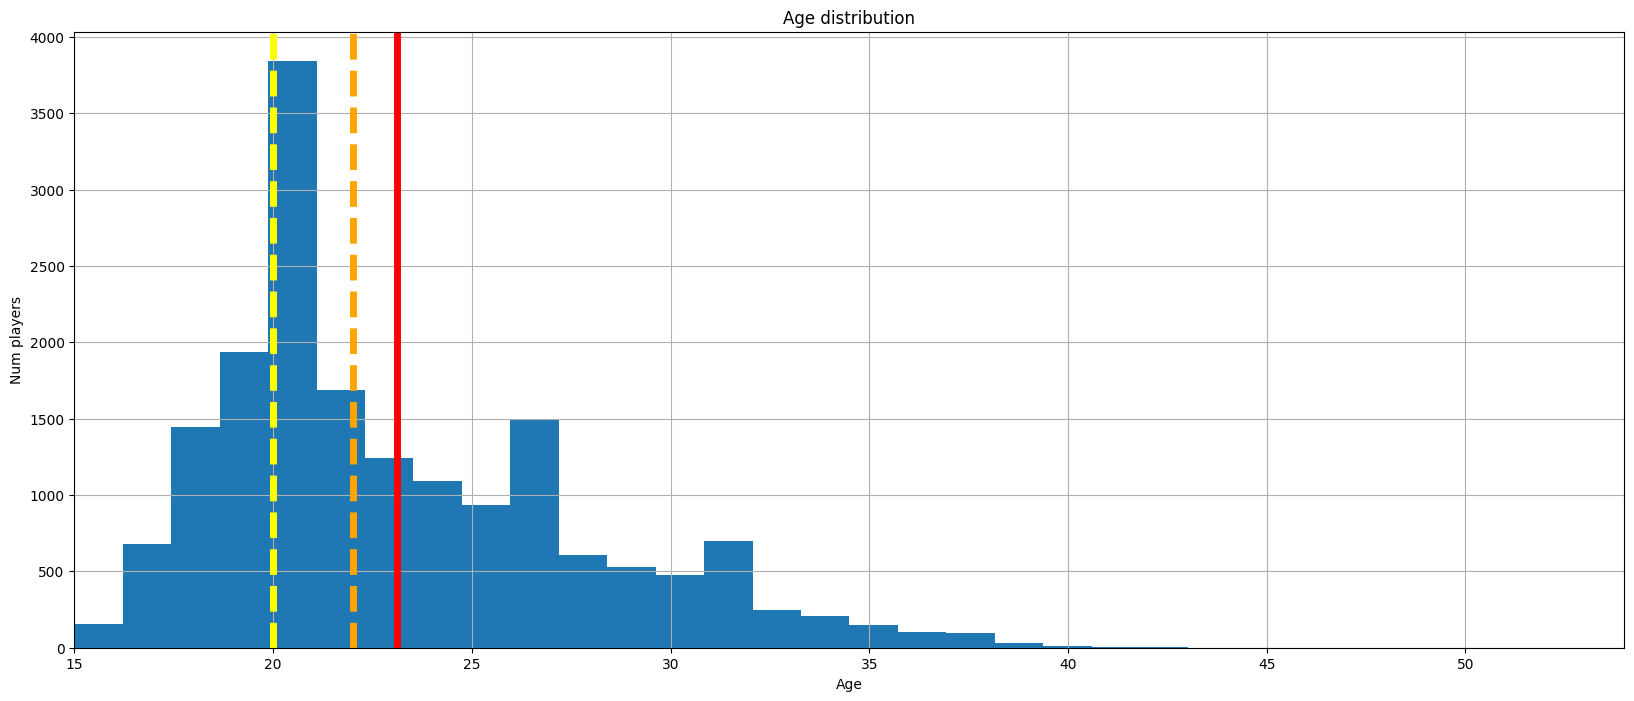

In [90]:
# Унимодальное распределение
plt.figure(figsize=(20,8))
plt.hist(df['Age'], bins=(df['Age'].nunique()+1), density=False, log=False)
plt.grid()
plt.xlabel("Age")
plt.ylabel("Num players")
plt.title("Age distribution")
plt.xlim((df["Age"].min(), df['Age'].max()))
plt.axvline(df['Age'].mean(), c='red', lw=5) # Среднее
plt.axvline(df['Age'].median(), c='orange', ls='--', lw=5) # Медиана
plt.axvline(df['Age'].mode().item(), c='yellow', ls='--', lw=5) # Мода

In [91]:
df['Age'].mode().item()

20

In [92]:
salaries = [20_000 for _ in range(1000)]
boss = 10_000_000

In [93]:
salaries.append(boss)

In [94]:
import numpy as np

In [95]:
np.mean(salaries)

29970.02997002997

In [96]:
np.median(salaries)

20000.0

In [97]:
# Чтобы найти моду

df['Weight'].value_counts().reset_index()['index'][0]

70

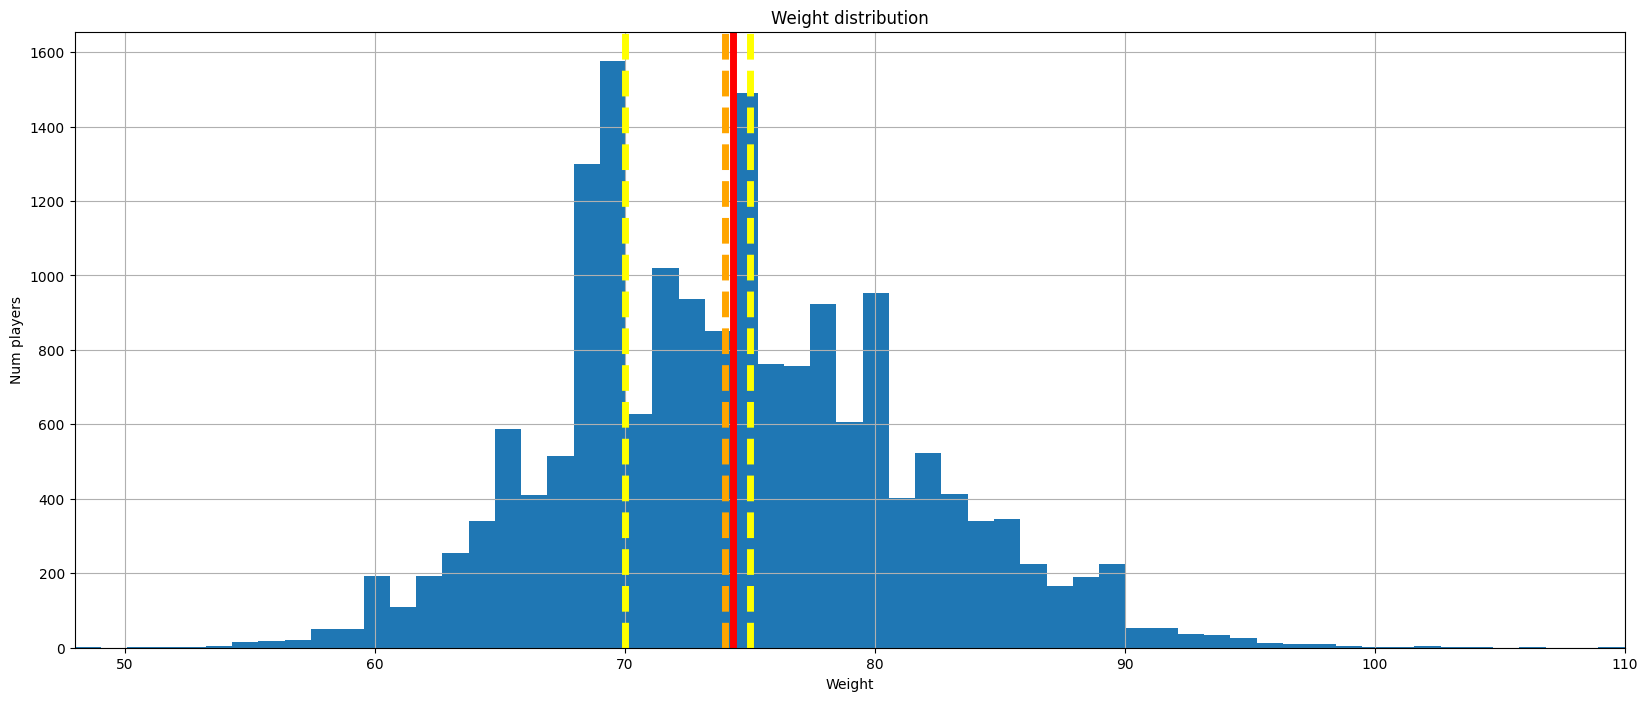

In [98]:
# Бимодальное распределение
plt.figure(figsize=(20,8))
plt.hist(df['Weight'], bins=(df['Weight'].nunique()+1), density=False, log=False)
plt.grid()
plt.xlabel("Weight")
plt.ylabel("Num players")
plt.title("Weight distribution")
plt.xlim((df["Weight"].min(), df['Weight'].max()))
plt.axvline(df['Weight'].mean(), c='red', lw=5) # Среднее
plt.axvline(df['Weight'].median(), c='orange', ls='--', lw=5) # Медиана


mode1, mode2 = df['Weight'].value_counts().reset_index()['index'][:2]
plt.axvline(mode1, c='yellow', ls='--', lw=5) # Мода 1
plt.axvline(mode2, c='yellow', ls='--', lw=5) # Мода 2

In [99]:
df['Weight'].value_counts().iloc[:10]

70    1576
75    1490
72    1021
80     954
73     936
78     924
74     852
76     762
77     757
68     740
Name: Weight, dtype: int64

# [Размах](https://ru.wikipedia.org/wiki/Размах_(статистика)), [Дисперсия](https://ru.wikipedia.org/wiki/Дисперсия_случайной_величины), [СКО](https://ru.wikipedia.org/wiki/Среднеквадратическое_отклонение)

In [100]:
# Размах
df['Age'].max() - df['Age'].min()

39

In [101]:
# Квартили
Q1 = df['Age'].quantile(0.25)
print("Q1:", Q1)
Q2 = df['Age'].quantile(0.5)
print("Q2:", Q2)
Q3 = df['Age'].quantile(0.75)
print("Q3:", Q3)
IQR = Q3 - Q1 # InterQuartileRange
print("IQR:", IQR)

Q1: 20.0
Q2: 22.0
Q3: 26.0
IQR: 6.0


In [82]:
df['Age'].median()

22.0

## [Boxplot](https://en.wikipedia.org/wiki/Box_plot)

<Axes: >

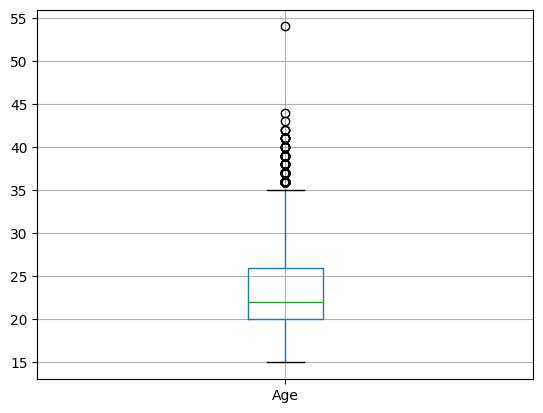

In [83]:
df.boxplot(['Age'])

## Расшифровка box-plot
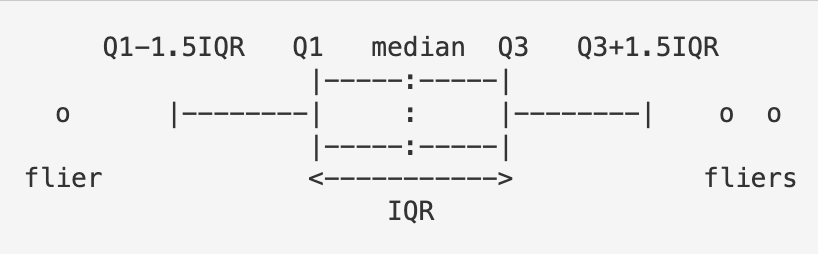

<Axes: >

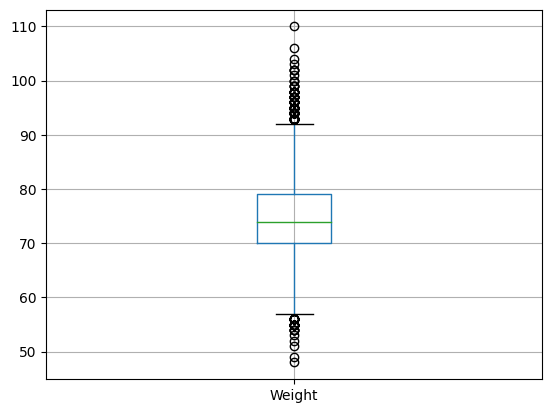

In [84]:
df.boxplot(['Weight'])

In [86]:
mean_age = df['Age'].mean()
var_age = df['Age'].var()
sko_age = var_age**(1/2) 

In [ ]:
# df['Age_type'] = df['Age'].apply(lambda x: 'blue' if mean_age - sko_age < x < mean_age - sko_age else 'red')

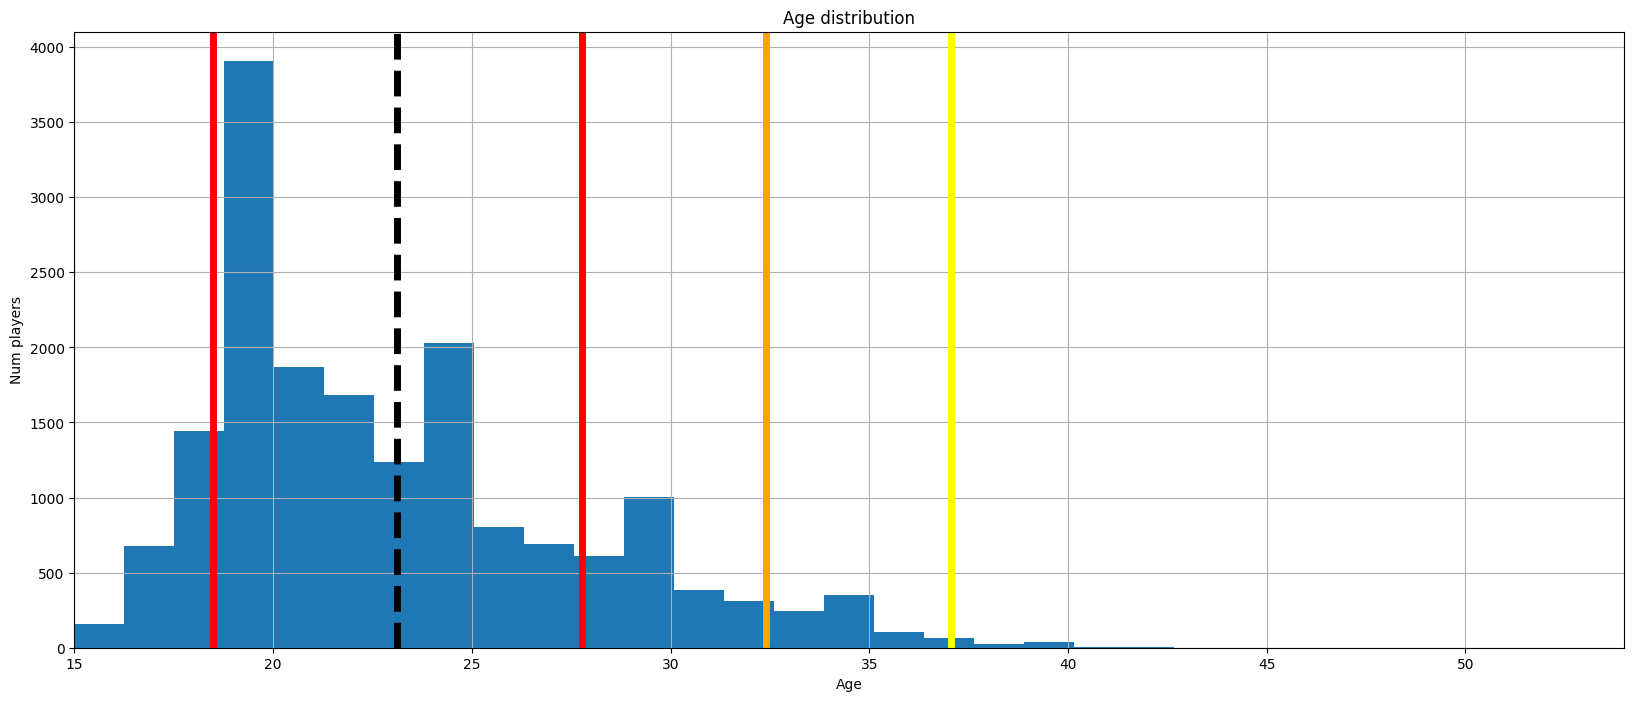

In [87]:
# Унимодальное распределение
plt.figure(figsize=(20,8))
plt.hist(df['Age'], bins=df["Age"].nunique())
plt.grid()
plt.xlabel("Age")
plt.ylabel("Num players")
plt.title("Age distribution")
plt.xlim((df["Age"].min(), df['Age'].max()))
plt.axvline(mean_age, c='black', ls='--', lw=5) # mean
plt.axvline(mean_age - sko_age, c='red', lw=5) # 1 sigma
plt.axvline(mean_age + sko_age, c='red', lw=5) # 1 sigma

plt.axvline(mean_age - 2*sko_age, c='orange', lw=5) # 1 sigma
plt.axvline(mean_age + 2*sko_age, c='orange', lw=5) # 1 sigma

plt.axvline(mean_age - 3*sko_age, c='yellow', lw=5) # 1 sigma
plt.axvline(mean_age + 3*sko_age, c='yellow', lw=5) # 1 sigma


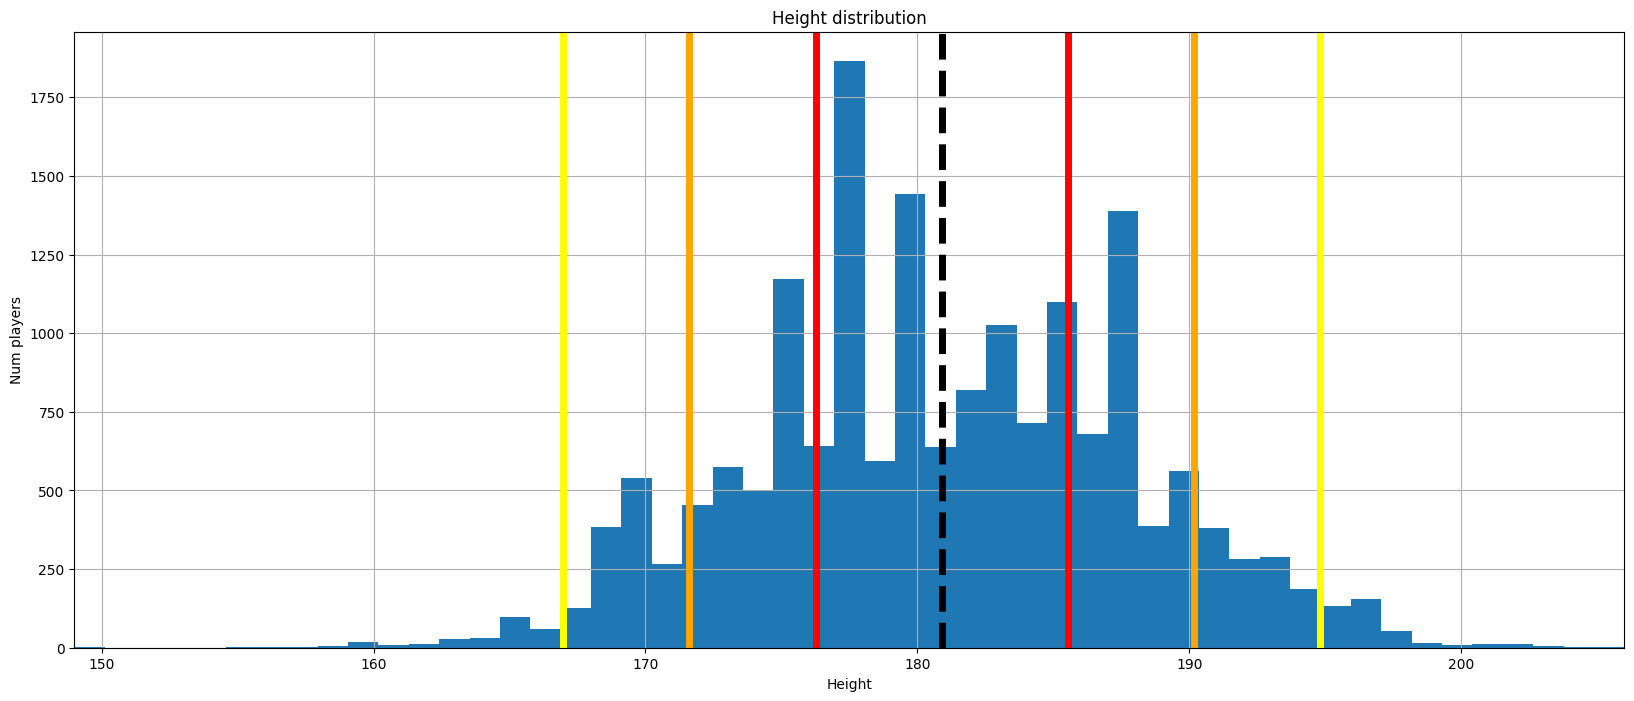

In [88]:
mean_height = df['Height'].mean()
var_height = df['Height'].var()
sko_height = var_age**(1/2)


plt.figure(figsize=(20,8))
plt.hist(df['Height'], bins=df["Height"].nunique())
plt.grid()
plt.xlabel("Height")
plt.ylabel("Num players")
plt.title("Height distribution")
plt.xlim((df["Height"].min(), df['Height'].max()))
plt.axvline(mean_height, c='black', ls='--', lw=5) # mean
plt.axvline(mean_height - sko_height, c='red', lw=5) # 1 sigma
plt.axvline(mean_height + sko_height, c='red', lw=5) # 1 sigma

plt.axvline(mean_height - 2*sko_height, c='orange', lw=5) # 2 sigma
plt.axvline(mean_height + 2*sko_height, c='orange', lw=5) # 2 sigma

plt.axvline(mean_height - 3*sko_height, c='yellow', lw=5) # 3 sigma
plt.axvline(mean_height + 3*sko_height, c='yellow', lw=5) # 3 sigma


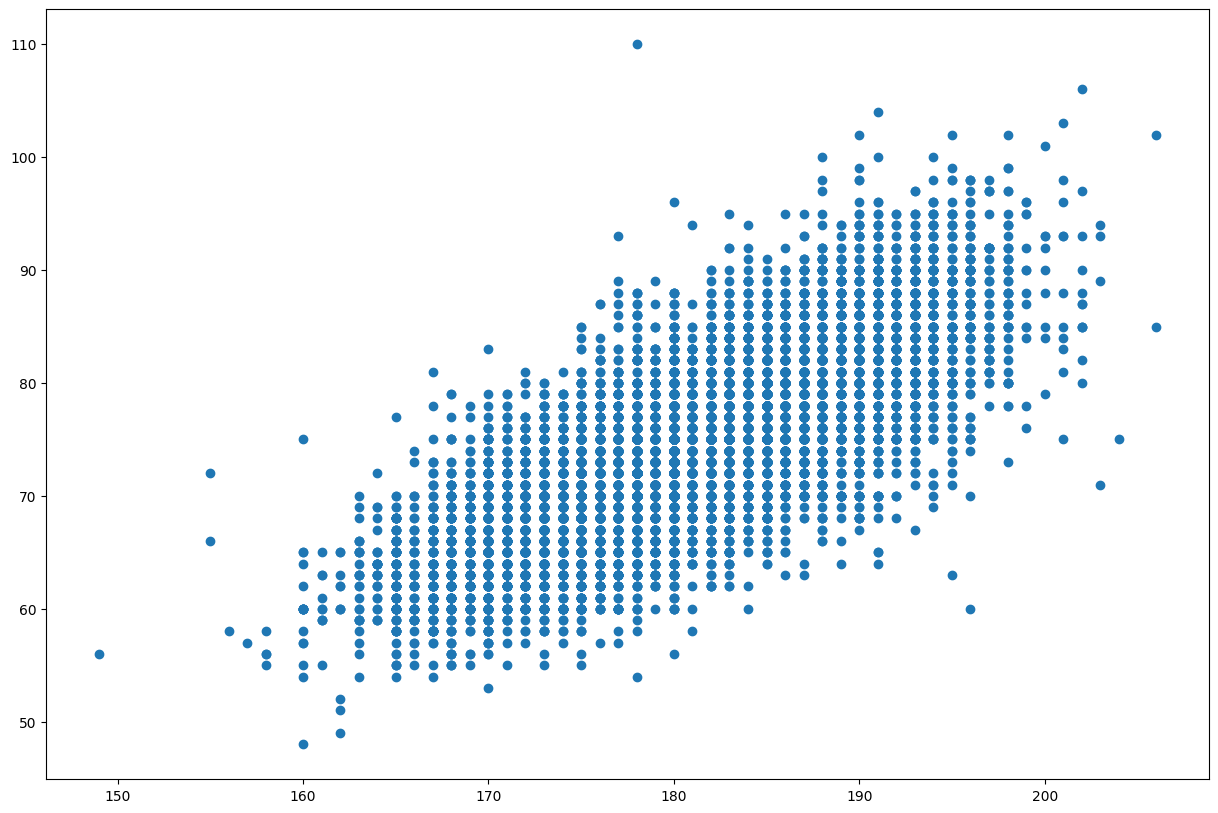

In [102]:
plt.figure(figsize=(15,10))
plt.scatter(df["Height"], df['Weight'])

In [103]:
# Создадим признак аномальности

In [104]:
height_mean = df["Height"].mean()
height_sko = df["Height"].var()**(1/2)

weight_mean = df["Weight"].mean()
weight_sko = df["Weight"].var()**(1/2)

height_mean, height_sko, weight_mean, weight_sko

(180.8934314835787, 6.962486092321407, 74.32616081540203, 6.982740704385269)

In [105]:
df['Height_outlier'] = df["Height"].apply(lambda x: not ( height_mean - 2*height_sko <= x <= height_mean + 2*height_sko))

In [106]:
df['Weight_outlier'] = df["Weight"].apply(lambda x: not ( weight_mean - 2*weight_sko <= x <= weight_mean + 2*weight_sko))

In [107]:
df['Outlier_color'] = df.apply(lambda x: 'red' if x.Height_outlier and x.Weight_outlier else \
                               'orange' if x.Height_outlier or x.Weight_outlier else 'green', axis=1)

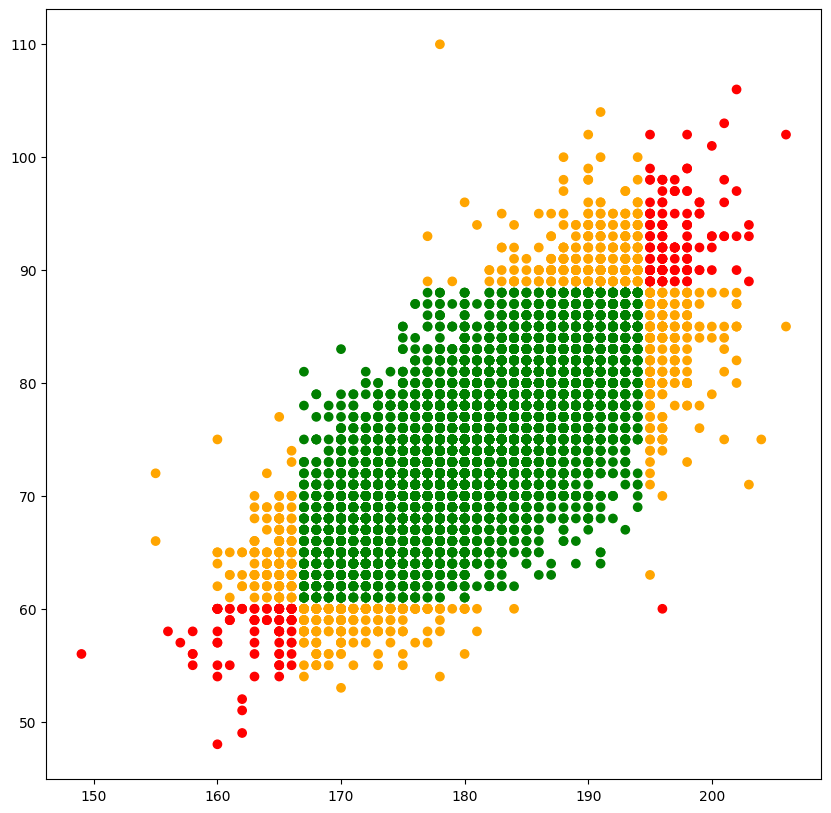

In [108]:
plt.figure(figsize=(10,10))
plt.scatter(df["Height"], df['Weight'], color=df['Outlier_color'])

In [109]:
bmi_mean = df["BMI"].mean()
bmi_sko = df["BMI"].var()**(1/2)
df['BMI_outlier'] = df["BMI"] \
.apply(lambda x: 'green' if bmi_mean - 2*bmi_sko <= x <= bmi_mean + 2*bmi_sko else 'red')

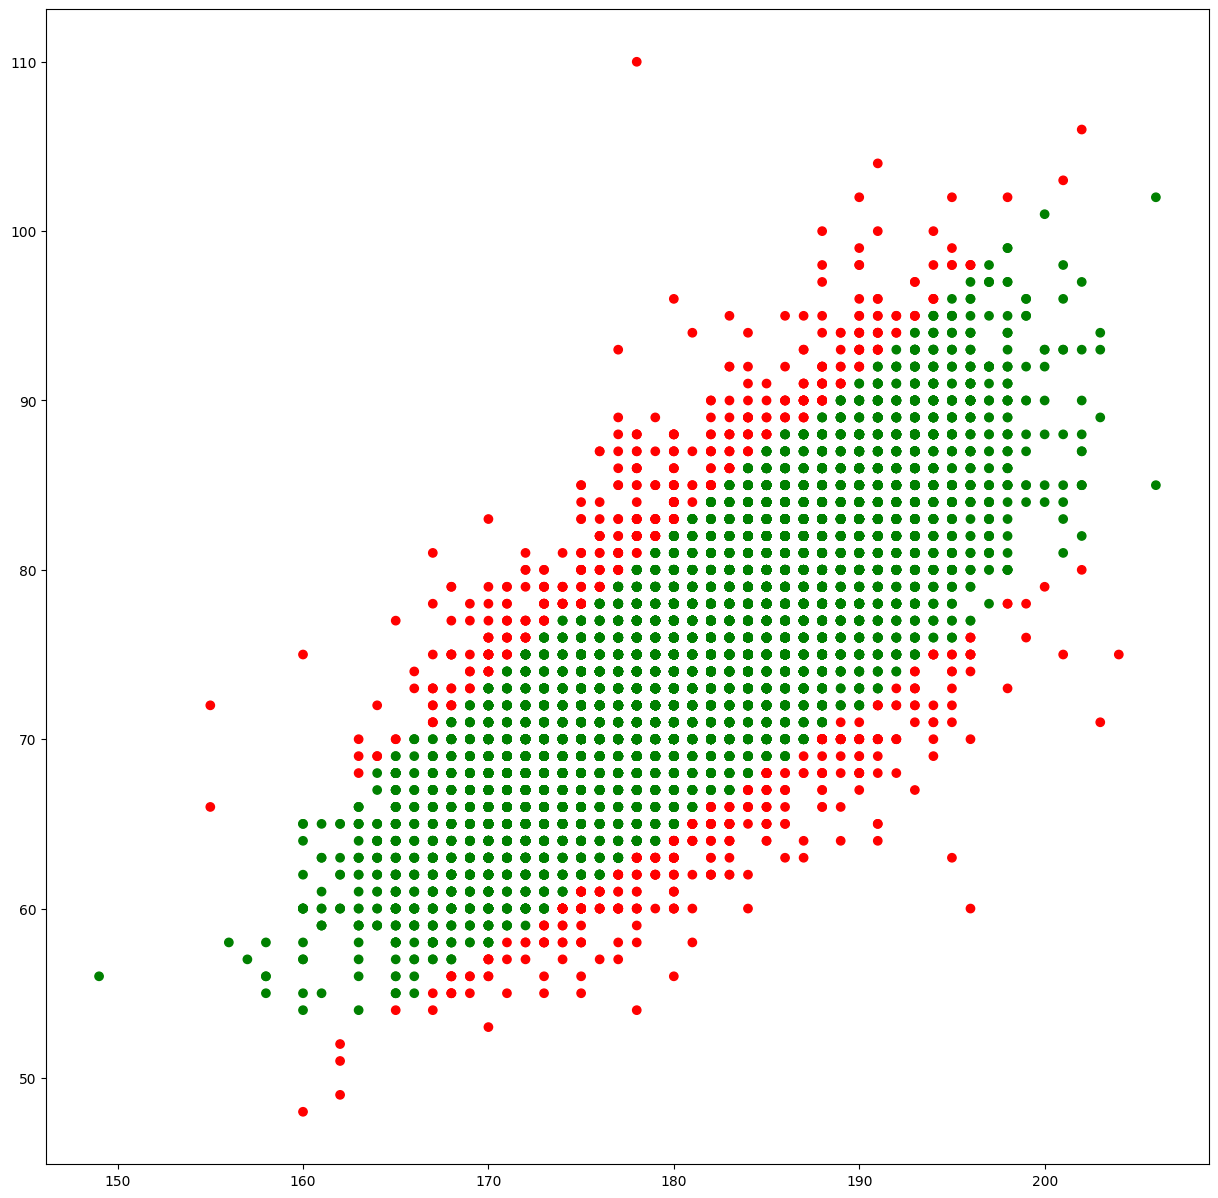

In [110]:
plt.figure(figsize=(15,15))
plt.scatter(df["Height"], df['Weight'], color=df['BMI_outlier'])

Text(0, 0.5, 'Height')

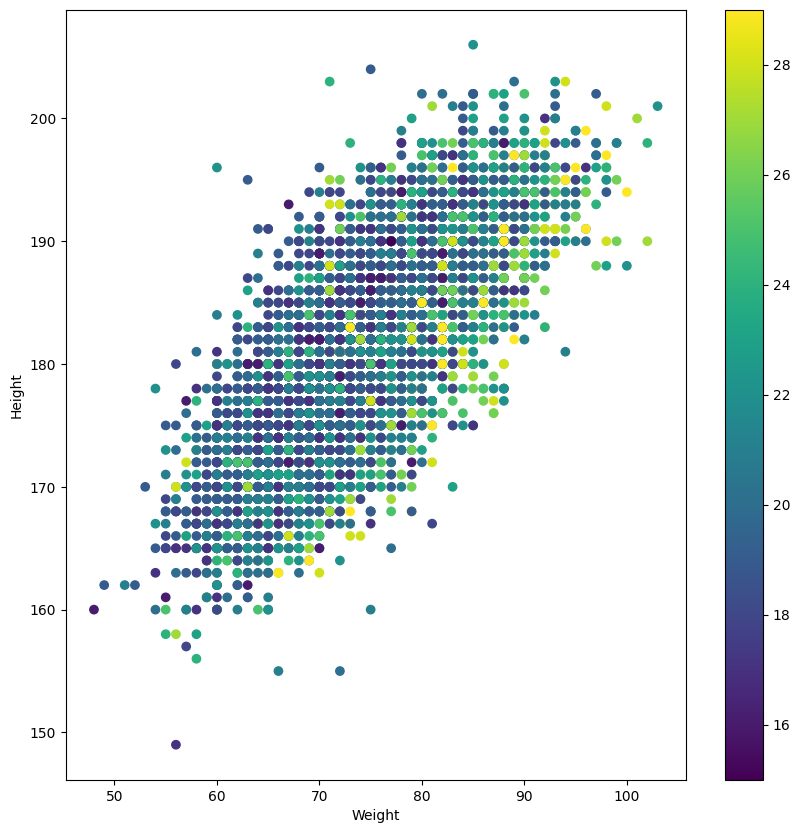

In [111]:
plt.figure(figsize=(10,10))
plt.scatter(x=df[df['Age'] < 30 ]['Weight'], y=df[df['Age'] < 30 ]['Height'], c=df[df['Age'] < 30 ]['Age'])
plt.colorbar()
plt.xlabel("Weight")
plt.ylabel('Height')

# Корреляция фичей

In [99]:
df[['Weight', 'Height']].corr()

Weight    Height
Weight  1.000000  0.764012
Height  0.764012  1.000000

# Correlation != casuation



## Пример 1
<img src="https://www.statology.org/wp-content/uploads/2021/08/corrCause1.png" width=600px align='left'>


## Пример 2
<img src="https://www.statology.org/wp-content/uploads/2021/08/corrCause3-1024x720.png" width=600px align='left'>

# Возможные причины

- Пропущенная переменная (Omitted variable)

- Обратная причинность (Reverse Causality)

- Смещение выборки (Selection bias)

- Ошибка измерения (Measurement error)

Пример: Маленькие дети, которые спят с включенным светом, гораздо более склонны к развитию близорукости в более позднем возрасте.

В какую категорию определим?

## [Много-много примеров странных корреляций](https://tylervigen.com/spurious-correlations)

# Нормализация

In [100]:
def normalize(val, mean, var):
    return (val - mean) / var**(1/2)

In [113]:
weight_mean = df['Weight'].mean()
weight_var = df['Weight'].var()

df['Weight_normalized'] = df['Weight'].apply(lambda x: (x - weight_mean) / weight_var**(1/2))

(array([1.000e+01, 3.470e+02, 1.896e+03, 5.039e+03, 5.721e+03, 3.588e+03,
        8.590e+02, 1.730e+02, 2.400e+01, 3.000e+00]),
 array([-3.77017591, -2.8822724 , -1.99436889, -1.10646538, -0.21856186,
         0.66934165,  1.55724516,  2.44514868,  3.33305219,  4.2209557 ,
         5.10885921]),
 <BarContainer object of 10 artists>)

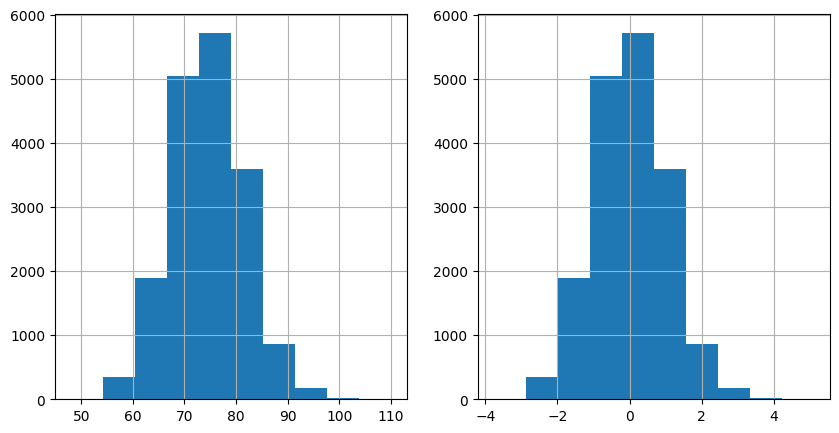

In [114]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.grid()
plt.hist(df['Weight'])

plt.subplot(1,2,2)
plt.grid()
plt.hist(df['Weight_normalized'])